# The Use of Matrices in Computer Graphics
### By Shahzeb Khan
For Professor Philley's Linear Algebra class.

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

Let's initialize a square box shape called `box`. Here we are just defining the coordinates needed to make the box. Important to note that computers draw their grid system slightly different than we are use to. The origin `(0,0)` is located at the top left. The y-axis increases downwards. The x-axis is unchanged.

In [26]:
# Define the coordinates for our box
box = np.array([[0,0],
      [2,0],
      [2,2],
      [0,2],
      [0,0]])
boxLocation = (3, 5); # Where on this grid our box will initially sit

Let's go ahead and define a function called `drawShape` can draw any coordinates onto a grid. We have already defined the coordinates for each point of our box so we will use a package called `trutle` to connect all these coordinates together and draw our shape

In [31]:
def drawShape(coordinates, location):
    figure(1)
    start = np.zeros((10, 10))
    print(location[0])
    imshow(coordinates, interpolation='nearest')
    grid(True)

3


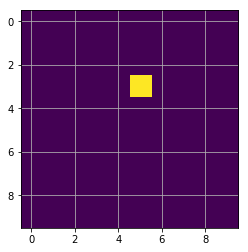

In [32]:
drawShape(boxZero, boxLocation)